In [1]:
import requests, time
from urllib.parse import quote
import pandas as pd
from bs4 import BeautifulSoup
import re
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm import tqdm
import folium
import math

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
service = Service('data/chromedriver_win32/chromedriver.exe')
driver = webdriver.Chrome(service=service)

In [3]:
events = ['kbaseball','wbaseball','kfootball','wfootball','basketball','volleyball','golf','general']
base_url = 'https://sports.news.naver.com/'
sub_url = '/news/index?isphoto=N&page='

In [4]:
url = f'{base_url}kbaseball{sub_url}1'
driver.get(url)

In [5]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [6]:
title = lis[0].select_one('.title').get_text().strip()
title

'올해도 뜨거운 롯데의 4월, 5월 하락세는 없다'

In [7]:
event_dict = {}
for event in events:
    url = f'{base_url}{event}{sub_url}1'
    driver.get(url)
    time.sleep(1)

    next_clicked = 0
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            num_pages = len(pages) + next_clicked * 10 if next_clicked >= 1 else len(pages) + 1
            event_dict[event] = num_pages
            break
event_dict

{'kbaseball': 10,
 'wbaseball': 4,
 'kfootball': 5,
 'wfootball': 23,
 'basketball': 5,
 'volleyball': 1,
 'golf': 5,
 'general': 5}

In [8]:
sports_title = ''
for event in event_dict.keys():
    for page in range(1, event_dict[event]+1):
        url = f'{base_url}{event}{sub_url}{page}'
        driver.get(url)
        time.sleep(2)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('.news_list > ul > li')
        for li in lis:
            sports_title += li.select_one('.title').get_text().strip() + '\n'

In [9]:
len(sports_title.split('\n'))
driver.close()

In [10]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [11]:
okt = Okt()
tokens = okt.nouns(sports_title)          
tokens[:10]

['올해', '롯데', '하락', '김광현', '개인', '통산', '승', '기념', '팬', '시간']

In [12]:
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:           
        new_tokens.append(item)

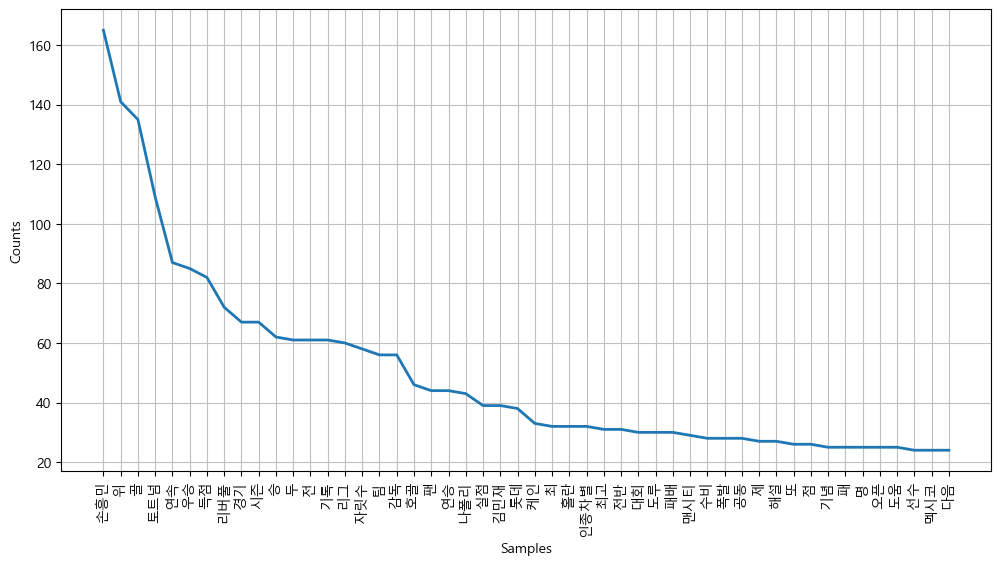

In [13]:
news = nltk.Text(new_tokens, name='스포츠 뉴스')
plt.figure(figsize=(12,6))
news.plot(50);

In [14]:
stoptext = """
    위 골 호골 경기 명 승 예비 안 팀 첫 점 환 호 입 니 등 수 두 전
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['올해', '롯데', '하락', '김광현', '개인', '통산', '기념', '팬', '시간', '영양가']

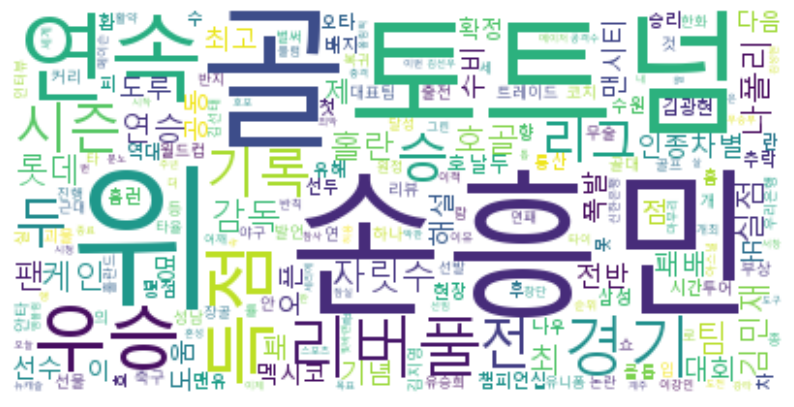

In [16]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='C:/Windows/Fonts/malgun.ttf', 
    relative_scaling=0.2
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');